In [1]:
%reset
import sys, os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION']=".97"
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE']="False"

# Change the current working directory to the desired path
os.chdir('/mnt/home/spandey/ceph/GODMAX/src/')
from jax.config import config
config.update("jax_enable_x64", True)
import numpy as np
import jax.numpy as jnp
import colossus 
from jax import vmap, grad
%matplotlib inline
import matplotlib.pyplot as pl
pl.rc('text', usetex=True)
# Palatino
pl.rc('font', family='DejaVu Sans')
#import pyccl as ccl
import pickle as pk

%load_ext autoreload
%autoreload 2





/tmp/ipykernel_2457394/2771123621.py:9: DeprecationWarning: Accessing jax.config via the jax.config submodule is deprecated.
  from jax.config import config


In [2]:
# cosmo_params_dict = {'flat': True, 'H0': 70.0, 'Om0': 0.2793, 'Ob0': 0.0463, 'sigma8': 0.821, 'ns': 0.972, 'w0':-1.0}
# sim_params_dict = {}
# sim_params_dict['nfw_trunc'] = True
# sim_params_dict['gamma_rhogas'] = 5.0
# sim_params_dict['delta_rhogas'] = 9.0
# # sim_params_dict['theta_co'] = 0.01
# # sim_params_dict['theta_ej'] = 1.0

# sim_params_dict['theta_co_0'] = 0.01
# sim_params_dict['log10_Mstar0_theta_co'] = 14.0
# sim_params_dict['nu_theta_co_M'] = 0.0
# sim_params_dict['nu_theta_co_z'] = 0.0

# sim_params_dict['theta_ej_0'] = 4.0
# sim_params_dict['log10_Mstar0_theta_ej'] = 13.0
# sim_params_dict['nu_theta_ej_M'] = 0.0
# sim_params_dict['nu_theta_ej_z'] = 0.0

# sim_params_dict['log10_Mc0'] = 15.1
# sim_params_dict['log10_Mstar0'] = 14.0
# sim_params_dict['mu_beta'] = 0.21
# sim_params_dict['nu_z'] = 0.0
# sim_params_dict['nu_M'] = 0.0

# sim_params_dict['eta_star'] = 0.3
# sim_params_dict['eta_cga'] = 0.6


# sim_params_dict['neg_bhse_plus_1'] = 0.833
# sim_params_dict['A_starcga'] = 0.09
# sim_params_dict['log10_M1_starcga'] = 11.4
# sim_params_dict['epsilon_rt'] = 4.0


# sim_params_dict['a_zeta'] = 0.3
# sim_params_dict['n_zeta'] = 2
# sim_params_dict['alpha_nt'] = 0.18
# sim_params_dict['beta_nt'] = 0.5
# sim_params_dict['n_nt'] = 0.3
# sim_params_dict['cosmo'] = cosmo_params_dict


# halo_params_dict = {}
# halo_params_dict['rmin'], halo_params_dict['rmax'], halo_params_dict['nr'] = 5e-3, 18, 256
# # halo_params_dict['zmin'], halo_params_dict['zmax'], halo_params_dict['nz'] = 0.001, 0.002, 2
# # halo_params_dict['zmin'], halo_params_dict['zmax'], halo_params_dict['nz'] = 0.001, 1.0, 10
# halo_params_dict['z_array'] = np.array([1e-3, 0.5, 1.0])
# # halo_params_dict['z_array'] = np.array([1e-3])
# # halo_params_dict['z_array'] = np.array([0.5])
# # halo_params_dict['z_array'] = np.array([1.0])
# halo_params_dict['nz'] = len(halo_params_dict['z_array'])
# halo_params_dict['lg10_Mmin'], halo_params_dict['lg10_Mmax'], halo_params_dict['nM'] = 11.0, 15.5, 48
# halo_params_dict['cmin'], halo_params_dict['cmax'], halo_params_dict['nc'] = 3, 7, 24
# halo_params_dict['ellmin'], halo_params_dict['ellmax'], halo_params_dict['nell'] = 8, 2**15, 64
# # try:
# halo_params_dict['sig_logc_z_array'] = np.ones(halo_params_dict['nz']) * 0.01
# halo_params_dict['mdef'] = '200c'
# halo_params_dict['hmf_model'] = 'T10'
# halo_params_dict['conc_model'] = 'Diemer15'
# halo_params_dict['do_corr_2h_mm'] = True

# # halo_params_dict['do_corr_2h_mm'] = False

# from astropy.io import fits
# df = fits.open('/mnt/home/spandey/ceph/GODMAX/data/sim_3x2pt_simulated_DV_PKproject_values_bestfit_maglim_3x2LCDM_final.fits') 
# z_array = df['nz_source'].data['Z_MID']
# nz_info_dict = {}
# nz_info_dict['z_array'] = z_array
# nz_info_dict['nbins'] = 4
# nz_info_dict['nz0'] = np.maximum(df['nz_source'].data['BIN1'], 1e-4)
# nz_info_dict['nz1'] = np.maximum(df['nz_source'].data['BIN2'], 1e-4)
# nz_info_dict['nz2'] = np.maximum(df['nz_source'].data['BIN3'], 1e-4)
# nz_info_dict['nz3'] = np.maximum(df['nz_source'].data['BIN4'], 1e-4)
# analysis_dict = {}
# analysis_dict['nz_info_dict'] = nz_info_dict
# analysis_dict['do_sheary'] = True
# analysis_dict['do_shear2pt'] = True
# analysis_dict['do_yy'] = False

# df_data = fits.open('/mnt/home/spandey/ceph/GODMAX/data/DES_ACT_full_data_theorycov_2.5.fits')
# theta_data = df_data['compton_shear'].data['ANG'][0:20]

# analysis_dict['ellmin_transf'], analysis_dict['ellmax_transf'], analysis_dict['nell_transf'] = 8, 2**15, 16384
# analysis_dict['angles_data_array'] = jnp.array(theta_data)
# analysis_dict['beam_fwhm_arcmin'] = 1.6
# analysis_dict['want_like_diff'] = False
# analysis_dict['calc_nfw_only'] = True





In [2]:
cosmo_params_dict = {'flat': True, 'H0': 70.0, 'Om0': 0.2793, 'Ob0': 0.0463, 'sigma8': 0.821, 'ns': 0.972, 'w0':-1.0}
sim_params_dict = {}
sim_params_dict['nfw_trunc'] = True
sim_params_dict['gamma_rhogas'] = 5.0
sim_params_dict['delta_rhogas'] = 9.0
# sim_params_dict['theta_co'] = 0.01
# sim_params_dict['theta_ej'] = 1.0

sim_params_dict['theta_co_0'] = 0.01
sim_params_dict['log10_Mstar0_theta_co'] = 15.0
sim_params_dict['nu_theta_co_M'] = 0.0
sim_params_dict['nu_theta_co_z'] = 0.0

sim_params_dict['theta_ej_0'] = 4.0
sim_params_dict['log10_Mstar0_theta_ej'] = 15.0
sim_params_dict['nu_theta_ej_M'] = 0.0
sim_params_dict['nu_theta_ej_z'] = 0.5

sim_params_dict['log10_Mc0'] = 15.1
sim_params_dict['log10_Mstar0'] = 14.0
sim_params_dict['mu_beta'] = 0.21
sim_params_dict['nu_z'] = -5.0
sim_params_dict['nu_M'] = 0.0

sim_params_dict['eta_star'] = 0.3
sim_params_dict['eta_cga'] = 0.6


sim_params_dict['neg_bhse_plus_1'] = 0.833
sim_params_dict['A_starcga'] = 0.09
sim_params_dict['log10_M1_starcga'] = 11.4
sim_params_dict['epsilon_rt'] = 4.0


sim_params_dict['a_zeta'] = 0.3
sim_params_dict['n_zeta'] = 2
sim_params_dict['alpha_nt'] = 0.18
sim_params_dict['beta_nt'] = 0.5
sim_params_dict['n_nt'] = 0.3
sim_params_dict['cosmo'] = cosmo_params_dict


halo_params_dict = {}
halo_params_dict['rmin'], halo_params_dict['rmax'], halo_params_dict['nr'] = 5e-3, 24, 128
# halo_params_dict['zmin'], halo_params_dict['zmax'], halo_params_dict['nz'] = 0.001, 0.002, 2
# halo_params_dict['zmin'], halo_params_dict['zmax'], halo_params_dict['nz'] = 0.001, 1.0, 10
halo_params_dict['z_array'] = np.array([1e-3, 0.5, 1.0])
# halo_params_dict['z_array'] = np.array([1e-3])
# halo_params_dict['z_array'] = np.array([0.5])
# halo_params_dict['z_array'] = np.array([1.0])
halo_params_dict['nz'] = len(halo_params_dict['z_array'])
halo_params_dict['lg10_Mmin'], halo_params_dict['lg10_Mmax'], halo_params_dict['nM'] = 13.0, 14.5, 48
halo_params_dict['cmin'], halo_params_dict['cmax'], halo_params_dict['nc'] = 3, 7, 24
halo_params_dict['ellmin'], halo_params_dict['ellmax'], halo_params_dict['nell'] = 8, 2**15, 64
# try:
halo_params_dict['sig_logc_z_array'] = np.ones(halo_params_dict['nz']) * 0.01
halo_params_dict['mdef'] = '200c'
halo_params_dict['hmf_model'] = 'T10'
halo_params_dict['conc_model'] = 'Diemer15'
halo_params_dict['do_corr_2h_mm'] = True

# halo_params_dict['do_corr_2h_mm'] = False

from astropy.io import fits
df = fits.open('/mnt/home/spandey/ceph/GODMAX/data/sim_3x2pt_simulated_DV_PKproject_values_bestfit_maglim_3x2LCDM_final.fits') 
z_array = df['nz_source'].data['Z_MID']
nz_info_dict = {}
nz_info_dict['z_array'] = z_array
nz_info_dict['nbins'] = 4
nz_info_dict['nz0'] = np.maximum(df['nz_source'].data['BIN1'], 1e-4)
nz_info_dict['nz1'] = np.maximum(df['nz_source'].data['BIN2'], 1e-4)
nz_info_dict['nz2'] = np.maximum(df['nz_source'].data['BIN3'], 1e-4)
nz_info_dict['nz3'] = np.maximum(df['nz_source'].data['BIN4'], 1e-4)
analysis_dict = {}
analysis_dict['nz_info_dict'] = nz_info_dict
analysis_dict['do_sheary'] = True
analysis_dict['do_shear2pt'] = True
analysis_dict['do_yy'] = False

df_data = fits.open('/mnt/home/spandey/ceph/GODMAX/data/DES_ACT_full_data_theorycov_2.5.fits')
theta_data = df_data['compton_shear'].data['ANG'][0:20]

analysis_dict['ellmin_transf'], analysis_dict['ellmax_transf'], analysis_dict['nell_transf'] = 8, 2**15, 16384
analysis_dict['angles_data_array'] = jnp.array(theta_data)
analysis_dict['beam_fwhm_arcmin'] = 1.6
analysis_dict['want_like_diff'] = False
analysis_dict['calc_nfw_only'] = True





In [3]:
saved_plot_data_all = pk.load(open('/mnt/home/spandey/ceph/GODMAX/data/ANTILES/fitting_results_all_sims_wparams.pkl','rb'))
all_sims_names = list(saved_plot_data_all.keys())


In [4]:
h = sim_params_dict['cosmo']['H0'] / 100.0
Ob = sim_params_dict['cosmo']['Ob0']
Om = sim_params_dict['cosmo']['Om0']
import astropy.units as u
from astropy import constants as const
import jax_cosmo.background as bkgrd
import scipy.integrate as integrate
from setup_power_spectra_jit import setup_power_BCMP
sigmat = const.sigma_T
m_e = const.m_e
c = const.c
coeff = sigmat / (m_e * (c ** 2))
oneMpc_h_to_cm = (((10 ** 6)/h) * (u.pc).to(u.cm))
const_coeff = ((coeff).to(((u.kpc ** 2) / u.keV))).value



In [20]:
import copy
from get_BCMP_profile_jit import BCM_18_wP
from setup_power_spectra_jit import setup_power_BCMP
from tqdm import tqdm

fb_fbSS = []
Y_YSS = []
Pksup_k1 = []
Pksup_k2 = []
Pksup_k3 = []
Pksup_k4 = []
saved_all = {}

for jsim in tqdm(range(len(all_sims_names))):
    sim_j = all_sims_names[jsim]
    saved_j = saved_plot_data_all[sim_j]
    params = saved_j['params_bestfit']
    params_vary_names = saved_j['params_vary_names']

    sim_params_dict_vary = copy.deepcopy(sim_params_dict)

    for jp in range(len(params_vary_names)):
        sim_params_dict_vary[params_vary_names[jp]] = params[jp]

    halo_params_dict_vary = copy.deepcopy(halo_params_dict)
    halo_params_dict_vary['lg10_Mmin'], halo_params_dict_vary['lg10_Mmax'], halo_params_dict_vary['nM'] = 10.0, 15.5, 48

    BCMP_test = BCM_18_wP(sim_params_dict_vary, halo_params_dict_vary)

    setup_power_BCMP_test = setup_power_BCMP(sim_params_dict_vary, halo_params_dict_vary, analysis_dict, num_points_trapz_int=64)

    Pk_sup = setup_power_BCMP_test.Pmm_sup_tot_mat
    k_sup = setup_power_BCMP_test.k

    k1 = 0.1
    k2 = 0.5
    k3 = 1.0
    k4 = 4.0

    indk1 = jnp.argmin(jnp.abs(k_sup - k1))
    indk2 = jnp.argmin(jnp.abs(k_sup - k2))
    indk3 = jnp.argmin(jnp.abs(k_sup - k3))
    indk4 = jnp.argmin(jnp.abs(k_sup - k4))

    M_test_noh = 1e14
    M_test = M_test_noh * h
    z_test = 0.0

    M_array = setup_power_BCMP_test.M_array
    z_array = setup_power_BCMP_test.z_array
    c_array = setup_power_BCMP_test.conc_array
    indz = np.argmin(np.abs(z_array - z_test))
    indM = np.argmin(np.abs(np.log10(M_array) - np.log10(M_test)))
    # indc = 
    c_test = setup_power_BCMP_test.conc_Mz_mat[indz, indM]
    indc = np.argmin(np.abs(c_array - c_test))

    r200c_Mz = BCMP_test.r200c_mat[indM, indz]
    indsel_r = np.where(BCMP_test.r_array < r200c_Mz)[0]
    r_array_j = BCMP_test.r_array[indsel_r]

    rho_cga_j = BCMP_test.rho_cga_mat[indsel_r,indc, indz, indM]
    rho_clm_j = BCMP_test.rho_clm_mat[indsel_r,indc, indz, indM]
    rho_gas_j = BCMP_test.rho_gas_mat[indsel_r,indc, indz, indM]
    rho_dmb_j = BCMP_test.rho_dmb_mat[indsel_r,indc, indz, indM]
    rho_nfw_j = BCMP_test.rho_nfw_mat[indsel_r,indc, indz, indM]
    Pe_mat_j = BCMP_test.Pe_mat_physical[indsel_r,indc, indz, indM]

    Mcga_int_j = integrate.simps(4 * np.pi * rho_cga_j * r_array_j**2 * r_array_j, np.log(r_array_j))
    Mclm_int_j = integrate.simps(4 * np.pi * rho_clm_j * r_array_j**2 * r_array_j, np.log(r_array_j))
    Mgas_int_j = integrate.simps(4 * np.pi * rho_gas_j * r_array_j**2 * r_array_j, np.log(r_array_j))
    Mdmb_int_j = integrate.simps(4 * np.pi * rho_dmb_j * r_array_j**2 * r_array_j, np.log(r_array_j))
    Mnfw_int_j = integrate.simps(4 * np.pi * rho_nfw_j * r_array_j**2 * r_array_j, np.log(r_array_j))
    Pe_int_j = integrate.simps(4 * np.pi * Pe_mat_j * r_array_j**2 * r_array_j, np.log(r_array_j)) * (oneMpc_h_to_cm**3)
    Y_int_j = const_coeff * Pe_int_j

    Ez = np.sqrt(bkgrd.growth_factor(setup_power_BCMP_test.cosmo_jax, setup_power_BCMP_test.scale_fac_a_array))[indz]
    M200_noh = M_array[indM]/h
    h70 = h/0.7
    Y_ss = 97.6 * (1/h70) * (Ez**(2/3.)) * (M200_noh/(1e15/h70))**(5/3.) * (Ob/0.043) * (0.25/Om)
    fb_ss = Ob/Om

    fcga = BCMP_test.fcga_array[indM]
    fstar = BCMP_test.fstar_array[indM]
    fsga = fstar - fcga
    fclm = BCMP_test.fclm_array[indM]

    fgas_ltr200 = Mgas_int_j/Mdmb_int_j
    fsga_ltr200 = (fsga/fclm) * (Mclm_int_j/Mdmb_int_j)
    fcga_ltr200 = Mcga_int_j/Mdmb_int_j

    fb_ltr200 = fgas_ltr200 + fsga_ltr200 + fcga_ltr200
    
    fb_fbSS.append(fb_ltr200/fb_ss)
    Y_YSS.append(Y_int_j/Y_ss)
    Pksup_k1.append(Pk_sup[indk1, indz])
    Pksup_k2.append(Pk_sup[indk2, indz])
    Pksup_k3.append(Pk_sup[indk3, indz])
    Pksup_k4.append(Pk_sup[indk4, indz])


    saved_jsim = {}
    saved_jsim['fb_fbSS'] = fb_ltr200/fb_ss
    saved_jsim['Y_YSS'] = Y_int_j/Y_ss
    saved_jsim['Pk_sup_k1'] = Pk_sup[indk1, indz]
    saved_jsim['Pk_sup_k2'] = Pk_sup[indk2, indz]
    saved_jsim['Pk_sup_k3'] = Pk_sup[indk3, indz]
    saved_jsim['Pk_sup_k4'] = Pk_sup[indk4, indz]
    saved_all[sim_j] = saved_jsim
    if np.mod(jsim, 5) == 0:
        pk.dump(saved_all, open('/mnt/home/spandey/ceph/GODMAX/data/ANTILES/Pksup_fb_Y_allsims.pkl','wb'))

    # print(fb_ltr200/fb_ss, Y_int_j/Y_ss, Pk_sup[indk1, indz], Pk_sup[indk2, indz], Pk_sup[indk3, indz], Pk_sup[indk4, indz])






  0%|          | 0/196 [00:00<?, ?it/s]

100%|██████████| 196/196 [1:09:19<00:00, 21.22s/it]


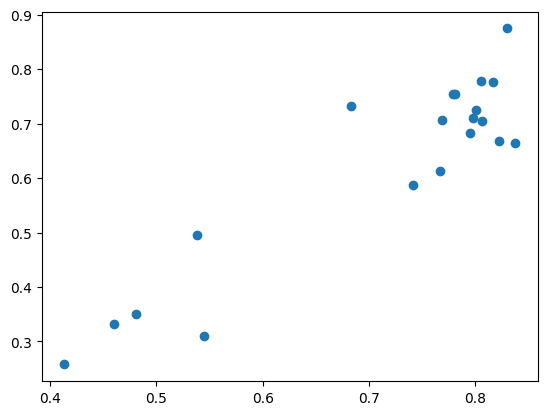

In [15]:
pl.figure()
pl.plot(fb_fbSS, Y_YSS, 'o')


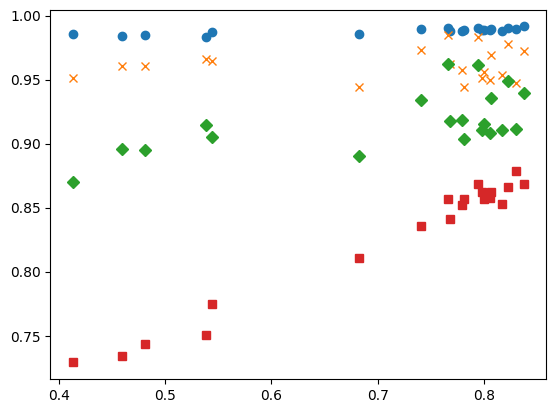

In [16]:
pl.figure()
pl.plot(fb_fbSS, Pksup_k1, 'o')
pl.plot(fb_fbSS, Pksup_k2, 'x')
pl.plot(fb_fbSS, Pksup_k3, 'D')
pl.plot(fb_fbSS, Pksup_k4, 's')


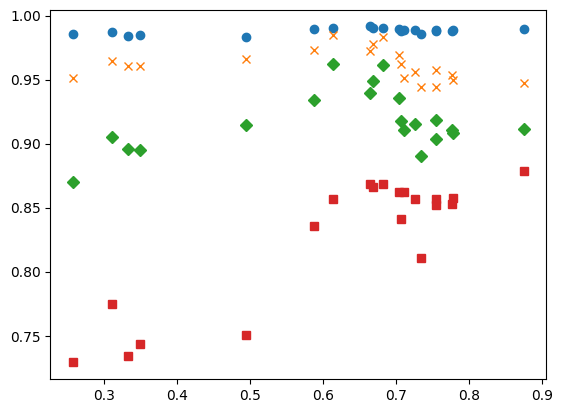

In [17]:
pl.figure()
pl.plot(Y_YSS, Pksup_k1, 'o')
pl.plot(Y_YSS, Pksup_k2, 'x')
pl.plot(Y_YSS, Pksup_k3, 'D')
pl.plot(Y_YSS, Pksup_k4, 's')


In [53]:
theta_ej_array


array([1.5       , 1.83333333, 2.16666667, 2.5       , 2.83333333,
       3.16666667, 3.5       , 3.83333333, 4.16666667, 4.5       ])

In [5]:
import copy
from get_BCMP_profile_jit import BCM_18_wP
from setup_power_spectra_jit import setup_power_BCMP
from tqdm import tqdm
import scipy.integrate as integrate
fb_fbSS = []
Y_YSS = []
Pksup_k1 = []
Pksup_k2 = []
Pksup_k3 = []
Pksup_k4 = []

Pksup2_k1 = []
Pksup2_k2 = []
Pksup2_k3 = []
Pksup2_k4 = []

saved_all = {}
theta_ej_array = np.linspace(1.5, 2.8, 20)

for jsim in tqdm(range(len(theta_ej_array))):
    # sim_j = all_sims_names[jsim]
    # saved_j = saved_plot_data_all[sim_j]
    # params = saved_j['params_bestfit']
    # params_vary_names = saved_j['params_vary_names']

    sim_params_dict_vary = copy.deepcopy(sim_params_dict)

    # for jp in range(len(params_vary_names)):
        # sim_params_dict_vary[params_vary_names[jp]] = params[jp]
    sim_params_dict_vary['theta_ej_0'] = theta_ej_array[jsim]

    halo_params_dict_vary = copy.deepcopy(halo_params_dict)
    halo_params_dict_vary['lg10_Mmin'], halo_params_dict_vary['lg10_Mmax'], halo_params_dict_vary['nM'] = 11.0, 15.5, 64

    BCMP_test = BCM_18_wP(sim_params_dict_vary, halo_params_dict_vary)

    setup_power_BCMP_test = setup_power_BCMP(sim_params_dict_vary, halo_params_dict_vary, analysis_dict, num_points_trapz_int=64)

    Pk_sup = setup_power_BCMP_test.Pmm_sup_tot_mat
    k_sup = setup_power_BCMP_test.k
    Pk_sup2 = (setup_power_BCMP_test.plin_kz_mat +  setup_power_BCMP_test.Pmm_dmb_1h_mat)/(setup_power_BCMP_test.plin_kz_mat +  setup_power_BCMP_test.Pmm_nfw_1h_mat)

    k1 = 0.4
    k2 = 0.7
    k3 = 1.0
    k4 = 2.0

    indk1 = jnp.argmin(jnp.abs(k_sup - k1))
    indk2 = jnp.argmin(jnp.abs(k_sup - k2))
    indk3 = jnp.argmin(jnp.abs(k_sup - k3))
    indk4 = jnp.argmin(jnp.abs(k_sup - k4))

    # M_test_noh = 1e14
    # M_test = M_test_noh * h

    z_test = 0.0   
    z_array = setup_power_BCMP_test.z_array   
    indz = np.argmin(np.abs(z_array - z_test))

    Mtest_noh_min = 6e13
    Mtest_noh_max = 2e14
    M_test_min = Mtest_noh_min * h    
    M_test_max = Mtest_noh_max * h

    M_array = setup_power_BCMP_test.M_array
    indM_min = np.argmin(np.abs(np.log10(M_array) - np.log10(M_test_min)))
    indM_max = np.argmin(np.abs(np.log10(M_array) - np.log10(M_test_max)))
    M_array_sel = M_array[indM_min:indM_max+1]
    fb_fbSS_sel = np.zeros(len(M_array_sel))
    Y_YSS_sel = np.zeros(len(M_array_sel))

    for indM in range(indM_min, indM_max+1):
        c_array = setup_power_BCMP_test.conc_array        
        # indM = np.argmin(np.abs(np.log10(M_array) - np.log10(M_test)))
        # indc = 
        c_test = setup_power_BCMP_test.conc_Mz_mat[indz, indM]
        indc = np.argmin(np.abs(c_array - c_test))

        r200c_Mz = BCMP_test.r200c_mat[indM, indz]
        indsel_r = np.where(BCMP_test.r_array < r200c_Mz)[0]
        r_array_j = BCMP_test.r_array[indsel_r]

        rho_cga_j = BCMP_test.rho_cga_mat[indsel_r,indc, indz, indM]
        rho_clm_j = BCMP_test.rho_clm_mat[indsel_r,indc, indz, indM]
        rho_gas_j = BCMP_test.rho_gas_mat[indsel_r,indc, indz, indM]
        rho_dmb_j = BCMP_test.rho_dmb_mat[indsel_r,indc, indz, indM]
        rho_nfw_j = BCMP_test.rho_nfw_mat[indsel_r,indc, indz, indM]
        Pe_mat_j = BCMP_test.Pe_mat_physical[indsel_r,indc, indz, indM]

        Mcga_int_j = integrate.simps(4 * np.pi * rho_cga_j * r_array_j**2 * r_array_j, np.log(r_array_j))
        Mclm_int_j = integrate.simps(4 * np.pi * rho_clm_j * r_array_j**2 * r_array_j, np.log(r_array_j))
        Mgas_int_j = integrate.simps(4 * np.pi * rho_gas_j * r_array_j**2 * r_array_j, np.log(r_array_j))
        Mdmb_int_j = integrate.simps(4 * np.pi * rho_dmb_j * r_array_j**2 * r_array_j, np.log(r_array_j))
        Mnfw_int_j = integrate.simps(4 * np.pi * rho_nfw_j * r_array_j**2 * r_array_j, np.log(r_array_j))
        Pe_int_j = integrate.simps(4 * np.pi * Pe_mat_j * r_array_j**2 * r_array_j, np.log(r_array_j)) * (oneMpc_h_to_cm**3)
        Y_int_j = const_coeff * Pe_int_j

        Ez = np.sqrt(bkgrd.growth_factor(setup_power_BCMP_test.cosmo_jax, setup_power_BCMP_test.scale_fac_a_array))[indz]
        M200_noh = M_array[indM]/h
        h70 = h/0.7
        Y_ss = 97.6 * (1/h70) * (Ez**(2/3.)) * (M200_noh/(1e15/h70))**(5/3.) * (Ob/0.043) * (0.25/Om)
        fb_ss = Ob/Om

        fcga = BCMP_test.fcga_array[indM]
        fstar = BCMP_test.fstar_array[indM]
        fsga = fstar - fcga
        fclm = BCMP_test.fclm_array[indM]

        fgas_ltr200 = Mgas_int_j/Mdmb_int_j
        fsga_ltr200 = (fsga/fclm) * (Mclm_int_j/Mdmb_int_j)
        fcga_ltr200 = Mcga_int_j/Mdmb_int_j

        fb_ltr200 = fgas_ltr200 + fsga_ltr200 + fcga_ltr200
        fb_fbSS_sel[indM-indM_min] = fb_ltr200/fb_ss
        Y_YSS_sel[indM-indM_min] = Y_int_j/Y_ss
    
    dndlnM = setup_power_BCMP_test.hmf_Mz_mat[indz, indM_min:indM_max+1]
    fb_fbSS_mean = integrate.simps(fb_fbSS_sel * dndlnM, np.log(M_array_sel)) / integrate.simps(dndlnM, np.log(M_array_sel))
    Y_YSS_mean = integrate.simps(Y_YSS_sel * dndlnM, np.log(M_array_sel)) / integrate.simps(dndlnM, np.log(M_array_sel))

    print(indM_min, indM_max, fb_fbSS_mean, Y_YSS_mean)
    # fb_fbSS.append(fb_ltr200/fb_ss)
    # Y_YSS.append(Y_int_j/Y_ss)

    fb_fbSS.append(fb_fbSS_mean)
    Y_YSS.append(Y_YSS_mean)

    Pksup_k1.append(Pk_sup[indk1, indz])
    Pksup_k2.append(Pk_sup[indk2, indz])
    Pksup_k3.append(Pk_sup[indk3, indz])
    Pksup_k4.append(Pk_sup[indk4, indz])

    Pksup2_k1.append(Pk_sup2[indk1, indz])
    Pksup2_k2.append(Pk_sup2[indk2, indz])
    Pksup2_k3.append(Pk_sup2[indk3, indz])
    Pksup2_k4.append(Pk_sup2[indk4, indz])    


    # saved_jsim = {}
    # saved_jsim['fb_fbSS'] = fb_ltr200/fb_ss
    # saved_jsim['Y_YSS'] = Y_int_j/Y_ss
    # saved_jsim['Pk_sup_k1'] = Pk_sup[indk1, indz]
    # saved_jsim['Pk_sup_k2'] = Pk_sup[indk2, indz]
    # saved_jsim['Pk_sup_k3'] = Pk_sup[indk3, indz]
    # saved_jsim['Pk_sup_k4'] = Pk_sup[indk4, indz]
    # saved_all[sim_j] = saved_jsim
    # if np.mod(jsim, 5) == 0:
    #     pk.dump(saved_all, open('/mnt/home/spandey/ceph/GODMAX/data/ANTILES/Pksup_fb_Y_allsims.pkl','wb'))

    # print(fb_ltr200/fb_ss, Y_int_j/Y_ss, Pk_sup[indk1, indz], Pk_sup[indk2, indz], Pk_sup[indk3, indz], Pk_sup[indk4, indz])






  5%|▌         | 1/20 [00:39<12:36, 39.82s/it]

37 44 0.8988416918801444 0.9995878300630165


 10%|█         | 2/20 [01:01<08:42, 29.03s/it]

37 44 0.8490859974934911 0.9411558026608575


 15%|█▌        | 3/20 [01:22<07:14, 25.59s/it]

37 44 0.8031083307977711 0.8865570694093977


 20%|██        | 4/20 [01:44<06:24, 24.04s/it]

37 44 0.7607319304718152 0.8356684852799658


 25%|██▌       | 5/20 [02:06<05:48, 23.21s/it]

37 44 0.7217305504799787 0.7883183708163861


 30%|███       | 6/20 [02:28<05:18, 22.74s/it]

37 44 0.685856166675971 0.7443067236570062


 35%|███▌      | 7/20 [02:49<04:52, 22.46s/it]

37 44 0.6528567261840332 0.7034199511922024


 40%|████      | 8/20 [03:11<04:27, 22.31s/it]

37 44 0.6224869936712283 0.6654411975858491


 45%|████▌     | 9/20 [03:34<04:05, 22.28s/it]

37 44 0.5945147605274815 0.6301573065645341


 50%|█████     | 10/20 [03:56<03:42, 22.25s/it]

37 44 0.5687240150509668 0.597363315360447


 55%|█████▌    | 11/20 [04:18<03:20, 22.27s/it]

37 44 0.5449161888246786 0.5668651325211033


 60%|██████    | 12/20 [04:40<02:58, 22.26s/it]

37 44 0.5229102309762487 0.5384809406538835


 65%|██████▌   | 13/20 [05:02<02:34, 22.13s/it]

37 44 0.5025419440494692 0.5120417880132964


 70%|███████   | 14/20 [05:25<02:13, 22.20s/it]

37 44 0.4836629321931018 0.4873916045352138


 75%|███████▌  | 15/20 [05:47<01:51, 22.36s/it]

37 44 0.46613938420145895 0.4643868194664551


 80%|████████  | 16/20 [06:10<01:29, 22.40s/it]

37 44 0.44985078839319437 0.44289576048281115


 85%|████████▌ | 17/20 [06:32<01:06, 22.23s/it]

37 44 0.4346886759802425 0.4227979194235928


 90%|█████████ | 18/20 [06:54<00:44, 22.36s/it]

37 44 0.4205554177239294 0.40398316173312937


 95%|█████████▌| 19/20 [07:17<00:22, 22.58s/it]

37 44 0.40736310945905835 0.38635092301496315


100%|██████████| 20/20 [07:39<00:00, 22.98s/it]

37 44 0.39503255080048866 0.3698094169437942


In [6]:
# dndlnM
# indM_min, indM_max
# k_sup



In [7]:
def Pk_sup_vd(fb, k):
    a, b, c, d, e = 2.111, 0.0038, 1.371, -5.816, -0.4005
    num = 2**a + 2**b * (c * fb)**(b-a)
    denom = k**(-a) + (c * fb)**(b-a) * k**(-b)
    exp_fac = np.exp(d*fb + e)
    val = 1 - num * exp_fac/denom
    return val

fb_arr = np.linspace(0.2, 1.0, 100)
# k1 = 0.415
k1 = 0.4
k2 = 0.7
k3 = 1.0
k4 = 4.0
Pk_sup_k1_vd = Pk_sup_vd(fb_arr, k1)
Pk_sup_k2_vd = Pk_sup_vd(fb_arr, k2)
Pk_sup_k3_vd = Pk_sup_vd(fb_arr, k3)
Pk_sup_k4_vd = Pk_sup_vd(fb_arr, k4)




In [12]:
df_spk = np.loadtxt('/mnt/home/spandey/ceph/GODMAX/data/ANTILES/fb_spk.csv', skiprows=1, delimiter=',')
# df_spk.shape
fb_spk = df_spk[:,1]
Pk_sup_k1_spk = df_spk[:,2]
Pk_sup_k2_spk = df_spk[:,3]
Pk_sup_k3_spk = df_spk[:,4]


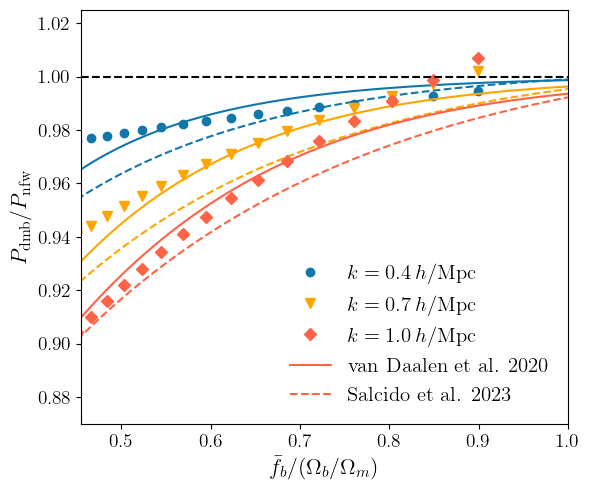

In [14]:
pl.figure(figsize=(6,5))
pl.plot(fb_fbSS, Pksup2_k1, 'o',  color='#1177AA', label=r'$k=0.4 \, h/$Mpc')
pl.plot(fb_arr, Pk_sup_k1_vd, color='#1177AA')
pl.plot(fb_spk, Pk_sup_k1_spk, ls='--', color='#1177AA')
pl.plot(fb_fbSS, Pksup_k2, 'v', color='orange', ms=7.0, label=r'$k=0.7 \, h/$Mpc')
pl.plot(fb_arr, Pk_sup_k2_vd, color='orange')
pl.plot(fb_spk, Pk_sup_k2_spk, color='orange', ls='--')
pl.plot(fb_fbSS, Pksup_k3, 'D', color='tomato', label=r'$k=1.0 \, h/$Mpc')
pl.plot(fb_arr, Pk_sup_k3_vd, color='tomato', label='van Daalen et al. 2020')
pl.plot(fb_spk, Pk_sup_k3_spk, ls='--', color='tomato', label='Salcido et al. 2023')
# pl.plot(fb_fbSS, Pksup_k4, 's', label=r'$k=4.0$')
# pl.plot(fb_arr, Pk_sup_k4_vd, color='r')
pl.xlim(0.455, 1.0)
pl.ylim(0.87, 1.025)
# pl.grid()
pl.axhline(1.0, color='k', ls='--')
pl.xlabel(r'$\bar{f}_b/(\Omega_b/\Omega_m)$', fontsize=16)
pl.ylabel(r'$P_{\rm dmb}/P_{\rm nfw}$', fontsize=16)
pl.tick_params(axis='both', which='major', labelsize=14)
pl.tick_params(axis='both', which='minor', labelsize=14)
pl.legend(loc='lower right', frameon=False, fontsize=15)

pl.tight_layout()

# pl.savefig('/mnt/home/spandey/ceph/GODMAX/notebooks/plots/Pksup_fb_thetaej_FINALSET.pdf', bbox_inches='tight')




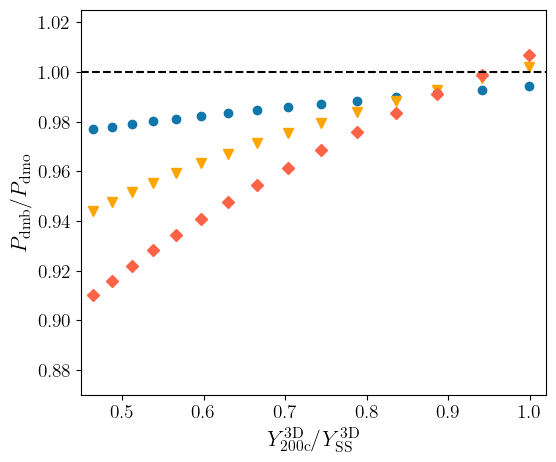

In [ ]:
pl.figure(figsize=(6,5))
# pl.plot(Y_YSS, Pksup_k1, 'o')
# pl.plot(Y_YSS, Pksup2_k1, 'x', color='b', label=r'$k=0.7$')
pl.plot(Y_YSS, Pksup2_k1, 'o', color='#1177AA', label=r'$k=0.4$')
pl.plot(Y_YSS, Pksup_k2, 'v', color='orange',ms=7.0,  label=r'$k=0.7$')
# pl.plot(fb_arr, Pk_sup_k2_vd, color='b')
pl.plot(Y_YSS, Pksup_k3, 'D', color='tomato', label=r'$k=1.0$')
# pl.plot(fb_arr, Pk_sup_k3_vd, color='r', label='Fit van Daleen 19')
# pl.plot(Y_YSS, Pksup_k4, 's', label=r'$k=4.0$')

# pl.plot(Y_YSS, Pksup_k2, 'x', color='b', label=r'$k=0.6$')
# pl.plot(Y_YSS, Pksup_k3, 'D', color='r', label=r'$k=1.0$')

# pl.plot(Y_YSS, Pksup_k2, 'x')
# pl.plot(Y_YSS, Pksup_k3, 'D')
# pl.plot(Y_YSS, Pksup_k4, 's')
pl.xlim(0.45, 1.02)
pl.ylim(0.87, 1.025)
# pl.grid()
pl.axhline(1.0, color='k', ls='--')
# pl.xlabel(r'$Y_{\rm 200c}/Y^{\rm SS}$')
# pl.ylabel(r'$P_{\rm dmb}/P_{\rm dmo}$')
pl.xlabel(r'$Y^{\rm 3D}_{\rm 200c}/Y^{\rm 3D}_{\rm SS}$', fontsize=16)
pl.ylabel(r'$P_{\rm dmb}/P_{\rm nfw}$', fontsize=16)
pl.tick_params(axis='both', which='major', labelsize=14)
pl.tick_params(axis='both', which='minor', labelsize=14)
# pl.legend(loc='lower right', frameon=False, fontsize=13)

# pl.legend(loc='lower right', frameon=False)

pl.savefig('/mnt/home/spandey/ceph/GODMAX/notebooks/plots/Pksup_Y_th_FINALSET.pdf', bbox_inches='tight')




/tmp/ipykernel_391515/2445408769.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')  # or any other colormap you like
  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:00<00:00, 729.20it/s]


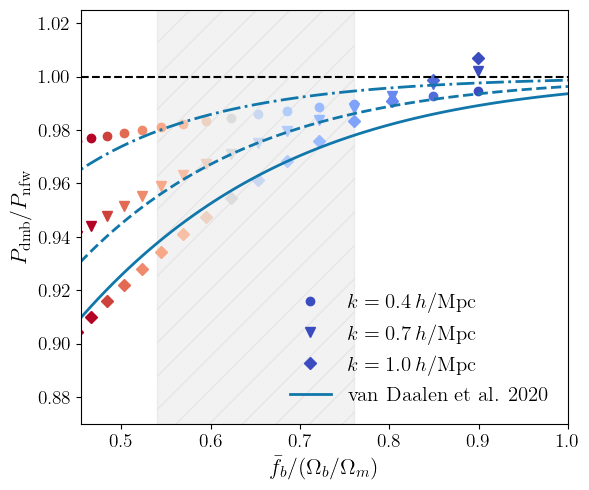

In [22]:
from matplotlib import cm, colorbar
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

pl.figure(figsize=(6,5))

cmap = cm.get_cmap('coolwarm')  # or any other colormap you like
# create a normalize object the scales the input Mc0 value to the range [0,1]
norm = Normalize(vmin=(theta_ej_array).min(), vmax=(theta_ej_array[:-5]).max())

for jM in tqdm(range(len(theta_ej_array))):
    color = cmap(norm((theta_ej_array[jM])))
    if jM == 0:
        pl.plot(fb_fbSS[jM], Pksup2_k1[jM], 'o',  color=color, label=r'$k=0.4 \, h/$Mpc')
        # pl.plot(fb_arr[jM], Pk_sup_k1_vd, color=color)
        pl.plot(fb_fbSS[jM], Pksup_k2[jM], 'v', color=color, ms=7.0, label=r'$k=0.7 \, h/$Mpc')
        # pl.plot(fb_arr[jM], Pk_sup_k2_vd[jM], color=color)
        pl.plot(fb_fbSS[jM], Pksup_k3[jM], 'D', color=color, label=r'$k=1.0 \, h/$Mpc')
        # pl.plot(fb_arr[jM], Pk_sup_k3_vd[jM], color=color, label='van Daalen et al. 2020')
    else:
        pl.plot(fb_fbSS[jM], Pksup2_k1[jM], 'o',  color=color)
        # pl.plot(fb_arr[jM], Pk_sup_k1_vd, color=color)
        pl.plot(fb_fbSS[jM], Pksup_k2[jM], 'v', color=color, ms=7.0)
        # pl.plot(fb_arr[jM], Pk_sup_k2_vd[jM], color=color)
        pl.plot(fb_fbSS[jM], Pksup_k3[jM], 'D', color=color)
        # pl.plot(fb_arr[jM], Pk_sup_k3_vd[jM], color=color)

# pl.plot(fb_arr[jM], Pk_sup_k3_vd[jM], color=color, label='van Daalen et al. 2020')
# pl.plot(fb_fbSS, Pksup2_k1, 'o',  color='#1177AA', label=r'$k=0.4 \, h/$Mpc')
pl.plot(fb_arr, Pk_sup_k1_vd, color='#1177AA', ls='-.', lw=2.0)
# pl.plot(fb_fbSS, Pksup_k2, 'v', color='orange', ms=7.0, label=r'$k=0.7 \, h/$Mpc')
# pl.plot(fb_arr, Pk_sup_k2_vd, color='orange', ls='--', lw=2.0)
pl.plot(fb_arr, Pk_sup_k2_vd, color='#1177AA', ls='--', lw=2.0)
# pl.plot(fb_fbSS, Pksup_k3, 'D', color='tomato', label=r'$k=1.0 \, h/$Mpc')
# pl.plot(fb_arr, Pk_sup_k3_vd, color='tomato', label='van Daalen et al. 2020', lw=2.0)
pl.plot(fb_arr, Pk_sup_k3_vd, color='#1177AA', label='van Daalen et al. 2020', lw=2.0)

# pl.plot(fb_fbSS, Pksup_k4, 's', label=r'$k=4.0$')
# pl.plot(fb_arr, Pk_sup_k4_vd, color='r')
pl.xlim(0.455, 1.0)
pl.ylim(0.87, 1.025)
# make it hatched:
pl.axvspan(0.54, 0.76, alpha=0.05, color='k', hatch='/')
# pl.grid()
pl.axhline(1.0, color='k', ls='--')
pl.xlabel(r'$\bar{f}_b/(\Omega_b/\Omega_m)$', fontsize=16)
pl.ylabel(r'$P_{\rm dmb}/P_{\rm nfw}$', fontsize=16)
pl.tick_params(axis='both', which='major', labelsize=14)
pl.tick_params(axis='both', which='minor', labelsize=14)
pl.legend(loc='lower right', frameon=False, fontsize=15)

pl.tight_layout()

# pl.savefig('/mnt/home/spandey/ceph/GODMAX/notebooks/plots/Pksup_fb_thetaej_FINALSET.pdf', bbox_inches='tight')




/tmp/ipykernel_391515/1620579275.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')  # or any other colormap you like


100%|██████████| 19/19 [00:00<00:00, 704.24it/s]
/tmp/ipykernel_391515/1620579275.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.tight_layout()


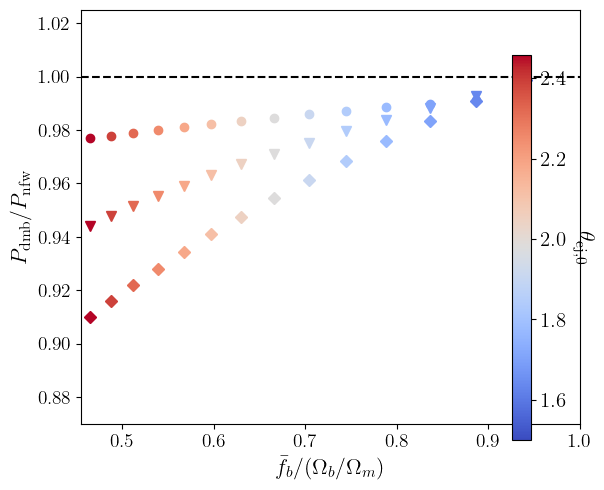

In [34]:
from matplotlib import cm, colorbar
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

pl.figure(figsize=(6,5))

cmap = cm.get_cmap('coolwarm')  # or any other colormap you like
# create a normalize object the scales the input Mc0 value to the range [0,1]
norm = Normalize(vmin=(theta_ej_array).min(), vmax=(theta_ej_array[:-5]).max())

for jM in tqdm(range(1, len(theta_ej_array))):
    color = cmap(norm((theta_ej_array[jM])))
    if jM == 0:
        pl.plot(Y_YSS[jM], Pksup2_k1[jM], 'o',  color=color, label=r'$k=0.4 \, h/$Mpc')
        # pl.plot(fb_arr[jM], Pk_sup_k1_vd, color=color)
        pl.plot(Y_YSS[jM], Pksup_k2[jM], 'v', color=color, ms=7.0, label=r'$k=0.7 \, h/$Mpc')
        # pl.plot(fb_arr[jM], Pk_sup_k2_vd[jM], color=color)
        pl.plot(Y_YSS[jM], Pksup_k3[jM], 'D', color=color, label=r'$k=1.0 \, h/$Mpc')
        # pl.plot(fb_arr[jM], Pk_sup_k3_vd[jM], color=color, label='van Daalen et al. 2020')
    else:
        pl.plot(Y_YSS[jM], Pksup2_k1[jM], 'o',  color=color)
        # pl.plot(fb_arr[jM], Pk_sup_k1_vd, color=color)
        pl.plot(Y_YSS[jM], Pksup_k2[jM], 'v', color=color, ms=7.0)
        # pl.plot(fb_arr[jM], Pk_sup_k2_vd[jM], color=color)
        pl.plot(Y_YSS[jM], Pksup_k3[jM], 'D', color=color)
        # pl.plot(fb_arr[jM], Pk_sup_k3_vd[jM], color=color)

# pl.plot(fb_arr[jM], Pk_sup_k3_vd[jM], color=color, label='van Daalen et al. 2020')
# pl.plot(fb_fbSS, Pksup2_k1, 'o',  color='#1177AA', label=r'$k=0.4 \, h/$Mpc')
# pl.plot(fb_arr, Pk_sup_k1_vd, color='#1177AA', ls='-.', lw=2.0)
# # pl.plot(fb_fbSS, Pksup_k2, 'v', color='orange', ms=7.0, label=r'$k=0.7 \, h/$Mpc')
# # pl.plot(fb_arr, Pk_sup_k2_vd, color='orange', ls='--', lw=2.0)
# pl.plot(fb_arr, Pk_sup_k2_vd, color='#1177AA', ls='--', lw=2.0)
# # pl.plot(fb_fbSS, Pksup_k3, 'D', color='tomato', label=r'$k=1.0 \, h/$Mpc')
# # pl.plot(fb_arr, Pk_sup_k3_vd, color='tomato', label='van Daalen et al. 2020', lw=2.0)
# pl.plot(fb_arr, Pk_sup_k3_vd, color='#1177AA', label='van Daalen et al. 2020', lw=2.0)

# pl.plot(fb_fbSS, Pksup_k4, 's', label=r'$k=4.0$')
# pl.plot(fb_arr, Pk_sup_k4_vd, color='r')
pl.xlim(0.455, 1.0)
pl.ylim(0.87, 1.025)
# make it hatched:
# pl.axvspan(0.54, 0.76, alpha=0.05, color='k', hatch='/')
# pl.grid()
pl.axhline(1.0, color='k', ls='--')
pl.xlabel(r'$\bar{f}_b/(\Omega_b/\Omega_m)$', fontsize=16)
pl.ylabel(r'$P_{\rm dmb}/P_{\rm nfw}$', fontsize=16)
pl.tick_params(axis='both', which='major', labelsize=14)
pl.tick_params(axis='both', which='minor', labelsize=14)
# pl.legend(loc='lower right', frameon=False, fontsize=15)

sm = ScalarMappable(cmap=cmap, norm=norm)
# the array is not used in this case, but normally the values used for the colormap are passed here
sm.set_array([])
# add the colorbar to the figure
cbar = pl.colorbar(sm, ax=pl.gcf().get_axes(), orientation='vertical', fraction=0.05, pad=0.01)
cbar.set_label(r'$\theta_{\rm ej, 0}$', fontsize=16, rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=15)

pl.tight_layout()

# pl.savefig('/mnt/home/spandey/ceph/GODMAX/notebooks/plots/Pksup_fb_thetaej_FINALSET.pdf', bbox_inches='tight')




In [50]:
fb_fbSS


[0.8988416918801444,
 0.8490859974934911,
 0.8031083307977711,
 0.7607319304718152,
 0.7217305504799787,
 0.685856166675971,
 0.6528567261840332,
 0.6224869936712283,
 0.5945147605274815,
 0.5687240150509668,
 0.5449161888246786,
 0.5229102309762487,
 0.5025419440494692,
 0.4836629321931018,
 0.46613938420145895,
 0.44985078839319437,
 0.4346886759802425,
 0.4205554177239294,
 0.40736310945905835,
 0.39503255080048866]

/tmp/ipykernel_391515/1808058318.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('winter')  # or any other colormap you like
100%|██████████| 19/19 [00:00<00:00, 961.57it/s]


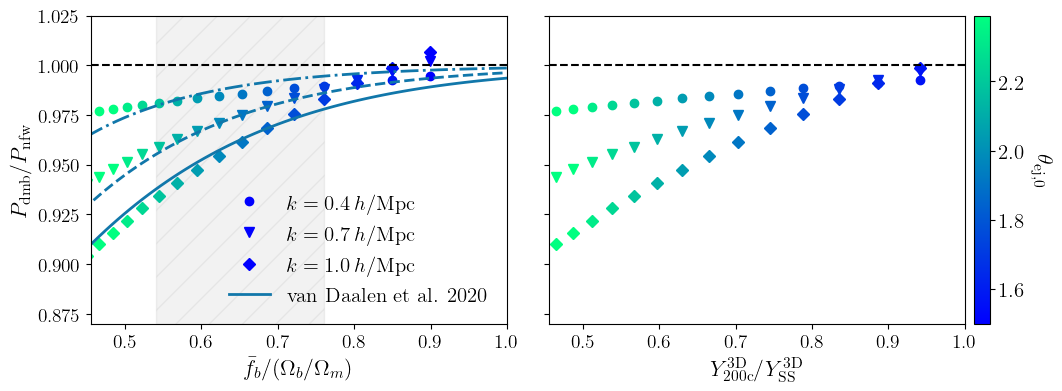

In [52]:
pl.rc('text', usetex=True)
# make a three panel plot, plotting all the theta_ej curves for for gty_out_thetaej[:,3,:], xip_out_thetaej[:,3,3,:], xim_out_thetaej[:,3,3,:]
# draw theta_ej curves from a colormap
from matplotlib import cm, colorbar
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

cmap = cm.get_cmap('winter')  # or any other colormap you like
# create a normalize object the scales the input Mc0 value to the range [0,1]
norm = Normalize(vmin=(theta_ej_array).min(), vmax=(theta_ej_array[:-6]).max())
# analysis_dict_vary['angles_data_array'] = jnp.logspace(np.log10(0.5), np.log10(100), fac_th * len(theta_data))

pl.figure(figsize=(12,4))
# increase the distance between subplots:
pl.subplots_adjust(wspace=0.1)
pl.subplot(121)
for jM in tqdm(range(len(theta_ej_array))):
    color = cmap(norm((theta_ej_array[jM])))
    if jM == 0:
        pl.plot(fb_fbSS[jM], Pksup2_k1[jM], 'o',  color=color, alpha=1.0, label=r'$k=0.4 \, h/$Mpc')
        # pl.plot(fb_arr[jM], Pk_sup_k1_vd, color=color)
        pl.plot(fb_fbSS[jM], Pksup_k2[jM], 'v', color=color, ms=7.0, alpha=1.0, label=r'$k=0.7 \, h/$Mpc')
        # pl.plot(fb_arr[jM], Pk_sup_k2_vd[jM], color=color)
        pl.plot(fb_fbSS[jM], Pksup_k3[jM], 'D', color=color, label=r'$k=1.0 \, h/$Mpc')
        # pl.plot(fb_arr[jM], Pk_sup_k3_vd[jM], color=color, label='van Daalen et al. 2020')
    else:
        pl.plot(fb_fbSS[jM], Pksup2_k1[jM], 'o',  color=color)
        # pl.plot(fb_arr[jM], Pk_sup_k1_vd, color=color)
        pl.plot(fb_fbSS[jM], Pksup_k2[jM], 'v', color=color, ms=7.0)
        # pl.plot(fb_arr[jM], Pk_sup_k2_vd[jM], color=color)
        pl.plot(fb_fbSS[jM], Pksup_k3[jM], 'D', color=color)
        # pl.plot(fb_arr[jM], Pk_sup_k3_vd[jM], color=color)

# pl.plot(fb_arr[jM], Pk_sup_k3_vd[jM], color=color, label='van Daalen et al. 2020')
# pl.plot(fb_fbSS, Pksup2_k1, 'o',  color='#1177AA', label=r'$k=0.4 \, h/$Mpc')
pl.plot(fb_arr, Pk_sup_k1_vd, color='#1177AA', ls='-.', lw=2.0)
# pl.plot(fb_fbSS, Pksup_k2, 'v', color='orange', ms=7.0, label=r'$k=0.7 \, h/$Mpc')
# pl.plot(fb_arr, Pk_sup_k2_vd, color='orange', ls='--', lw=2.0)
pl.plot(fb_arr, Pk_sup_k2_vd, color='#1177AA', ls='--', lw=2.0)
# pl.plot(fb_fbSS, Pksup_k3, 'D', color='tomato', label=r'$k=1.0 \, h/$Mpc')
# pl.plot(fb_arr, Pk_sup_k3_vd, color='tomato', label='van Daalen et al. 2020', lw=2.0)
pl.plot(fb_arr, Pk_sup_k3_vd, color='#1177AA', label='van Daalen et al. 2020', lw=2.0)

# pl.plot(fb_fbSS, Pksup_k4, 's', label=r'$k=4.0$')
# pl.plot(fb_arr, Pk_sup_k4_vd, color='r')
pl.xlim(0.455, 1.0)
pl.ylim(0.87, 1.025)
# make it hatched:
pl.axvspan(0.54, 0.76, alpha=0.05, color='k', hatch='/')
# pl.grid()
pl.axhline(1.0, color='k', ls='--')
pl.xlabel(r'$\bar{f}_b/(\Omega_b/\Omega_m)$', fontsize=16)
pl.ylabel(r'$P_{\rm dmb}/P_{\rm nfw}$', fontsize=16)
pl.tick_params(axis='both', which='major', labelsize=14)
pl.tick_params(axis='both', which='minor', labelsize=14)
pl.legend(loc='lower right', frameon=False, fontsize=15)

# pl.title('1-halo term')
pl.subplot(122)
for jM in tqdm(range(1, len(theta_ej_array))):
    color = cmap(norm((theta_ej_array[jM])))
    if jM == 0:
        pl.plot(Y_YSS[jM], Pksup2_k1[jM], 'o',  color=color, label=r'$k=0.4 \, h/$Mpc')
        # pl.plot(fb_arr[jM], Pk_sup_k1_vd, color=color)
        pl.plot(Y_YSS[jM], Pksup_k2[jM], 'v', color=color, ms=7.0, label=r'$k=0.7 \, h/$Mpc')
        # pl.plot(fb_arr[jM], Pk_sup_k2_vd[jM], color=color)
        pl.plot(Y_YSS[jM], Pksup_k3[jM], 'D', color=color, label=r'$k=1.0 \, h/$Mpc')
        # pl.plot(fb_arr[jM], Pk_sup_k3_vd[jM], color=color, label='van Daalen et al. 2020')
    else:
        pl.plot(Y_YSS[jM], Pksup2_k1[jM], 'o',  color=color)
        # pl.plot(fb_arr[jM], Pk_sup_k1_vd, color=color)
        pl.plot(Y_YSS[jM], Pksup_k2[jM], 'v', color=color, ms=7.0)
        # pl.plot(fb_arr[jM], Pk_sup_k2_vd[jM], color=color)
        pl.plot(Y_YSS[jM], Pksup_k3[jM], 'D', color=color)
# pl.legend()
pl.xlim(0.455, 1.0)
pl.ylim(0.87, 1.025)
# make it hatched:
# pl.axvspan(0.54, 0.76, alpha=0.05, color='k', hatch='/')
# pl.grid()
pl.axhline(1.0, color='k', ls='--')
pl.xlabel(r'$\bar{f}_b/(\Omega_b/\Omega_m)$', fontsize=16)
# pl.ylabel(r'$P_{\rm dmb}/P_{\rm nfw}$', fontsize=16)
pl.tick_params(axis='both', which='major', labelsize=14)
pl.tick_params(axis='both', which='minor', labelsize=0)
ax = pl.gca()
ax.yaxis.set_tick_params(labelleft=False)
pl.xlabel(r'$Y^{\rm 3D}_{\rm 200c}/Y^{\rm 3D}_{\rm SS}$', fontsize=16)
# pl.xticks([])
# pl.yticks([])
# pl.title('2-halo term')
# pl.subplot(133)
# for jM in tqdm(range(len(theta_ej_array))):
#     color = cmap(norm((theta_ej_array[jM])))
#     # pl.plot(analysis_dict_vary['angles_data_array'], 1e5*xim_out_all[jM,:], color=color, alpha=1.0,lw=1.0)
#     pl.plot(analysis_dict_vary['angles_data_array'], 1e4*xim_out_all[jM,:]*np.sqrt(analysis_dict_vary['angles_data_array']), color=color, alpha=1.0,lw=1.0)    
# # pl.errorbar(analysis_dict['angles_data_array'], 1e5*xim_data_to_plot, yerr=1e5*xim_sig_to_plot, fmt='o', color='k', label=r'LSST (Y1)$\times$SO', ms=3.05)
# pl.errorbar(analysis_dict['angles_data_array'], 1e4*xim_data_to_plot*np.sqrt(analysis_dict['angles_data_array']), yerr=1e4*xim_sig_to_plot*np.sqrt(analysis_dict['angles_data_array']), fmt='o', color='k', label=r'LSST (Y1)$\times$SO', ms=3.05)
# pl.legend(loc='lower left', fontsize=14)
# # pl.legend()
# pl.xscale('log')
# pl.text(20, 0.55, r'shear$\times$shear' + '\n' +'(Component 2)' + '\n' + r'Bin $4 \times 4$', fontsize=14)
# # pl.yscale('log')
# pl.xlim(2.3,100)
# pl.ylim(0.38,0.6)
# pl.ylabel(r'$10^4 \, \sqrt{\theta} \, \xi_-$', fontsize=15)
# pl.xlabel(r'$\theta$ (arcmin)', fontsize=15)
# # pl.title('2-halo term')
# pl.tick_params(axis='both', which='major', labelsize=14)
# pl.tick_params(axis='both', which='minor', labelsize=14)
# create a ScalarMappable with the colormap and norm
sm = ScalarMappable(cmap=cmap, norm=norm)
# the array is not used in this case, but normally the values used for the colormap are passed here
sm.set_array([])
# add the colorbar to the figure

cbar = pl.colorbar(sm, ax=pl.gcf().get_axes(), orientation='vertical', fraction=0.05, pad=0.01)
cbar.set_label(r'$\theta_{\rm ej, 0}$', fontsize=16, rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=15)
pl.savefig('/mnt/home/spandey/ceph/GODMAX/notebooks/plots/Pksup_fb_thetaej_FINALSET.pdf', bbox_inches='tight')




